In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree, export_graphviz
from sklearn import tree

In [2]:
dataCancer = pd.read_csv('dataCancer.csv')

In [3]:
dataCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataCancer.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
dataCancer = dataCancer.drop(['id', 'Unnamed: 32'], axis = 1)

In [7]:
dataCancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
X = dataCancer.drop('diagnosis', axis = 1)

In [9]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y = dataCancer['diagnosis']

In [11]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [13]:
X_train.shape

(426, 30)

In [14]:
X_test.shape

(143, 30)

In [15]:
model = DecisionTreeClassifier()

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
model.score(X_train, y_train)

1.0

In [18]:
predictions = model.predict(X_test)

In [19]:
model.score(X_test, y_test)

0.9370629370629371

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.94      0.95      0.95        87
           M       0.93      0.91      0.92        56

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [21]:
print(confusion_matrix(y_test, predictions))

[[83  4]
 [ 5 51]]


[Text(0.5833333333333334, 0.9285714285714286, 'concave points_mean <= 0.051\ngini = 0.464\nsamples = 426\nvalue = [270, 156]\nclass = B'),
 Text(0.375, 0.7857142857142857, 'area_se <= 38.16\ngini = 0.094\nsamples = 262\nvalue = [249, 13]\nclass = B'),
 Text(0.20833333333333334, 0.6428571428571429, 'concave points_worst <= 0.132\ngini = 0.032\nsamples = 246\nvalue = [242, 4]\nclass = B'),
 Text(0.08333333333333333, 0.5, 'texture_worst <= 33.27\ngini = 0.009\nsamples = 233\nvalue = [232, 1]\nclass = B'),
 Text(0.041666666666666664, 0.35714285714285715, 'gini = 0.0\nsamples = 218\nvalue = [218, 0]\nclass = B'),
 Text(0.125, 0.35714285714285715, 'texture_worst <= 33.8\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = B'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = M'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = B'),
 Text(0.3333333333333333, 0.5, 'texture_mean <= 22.61\ngini 

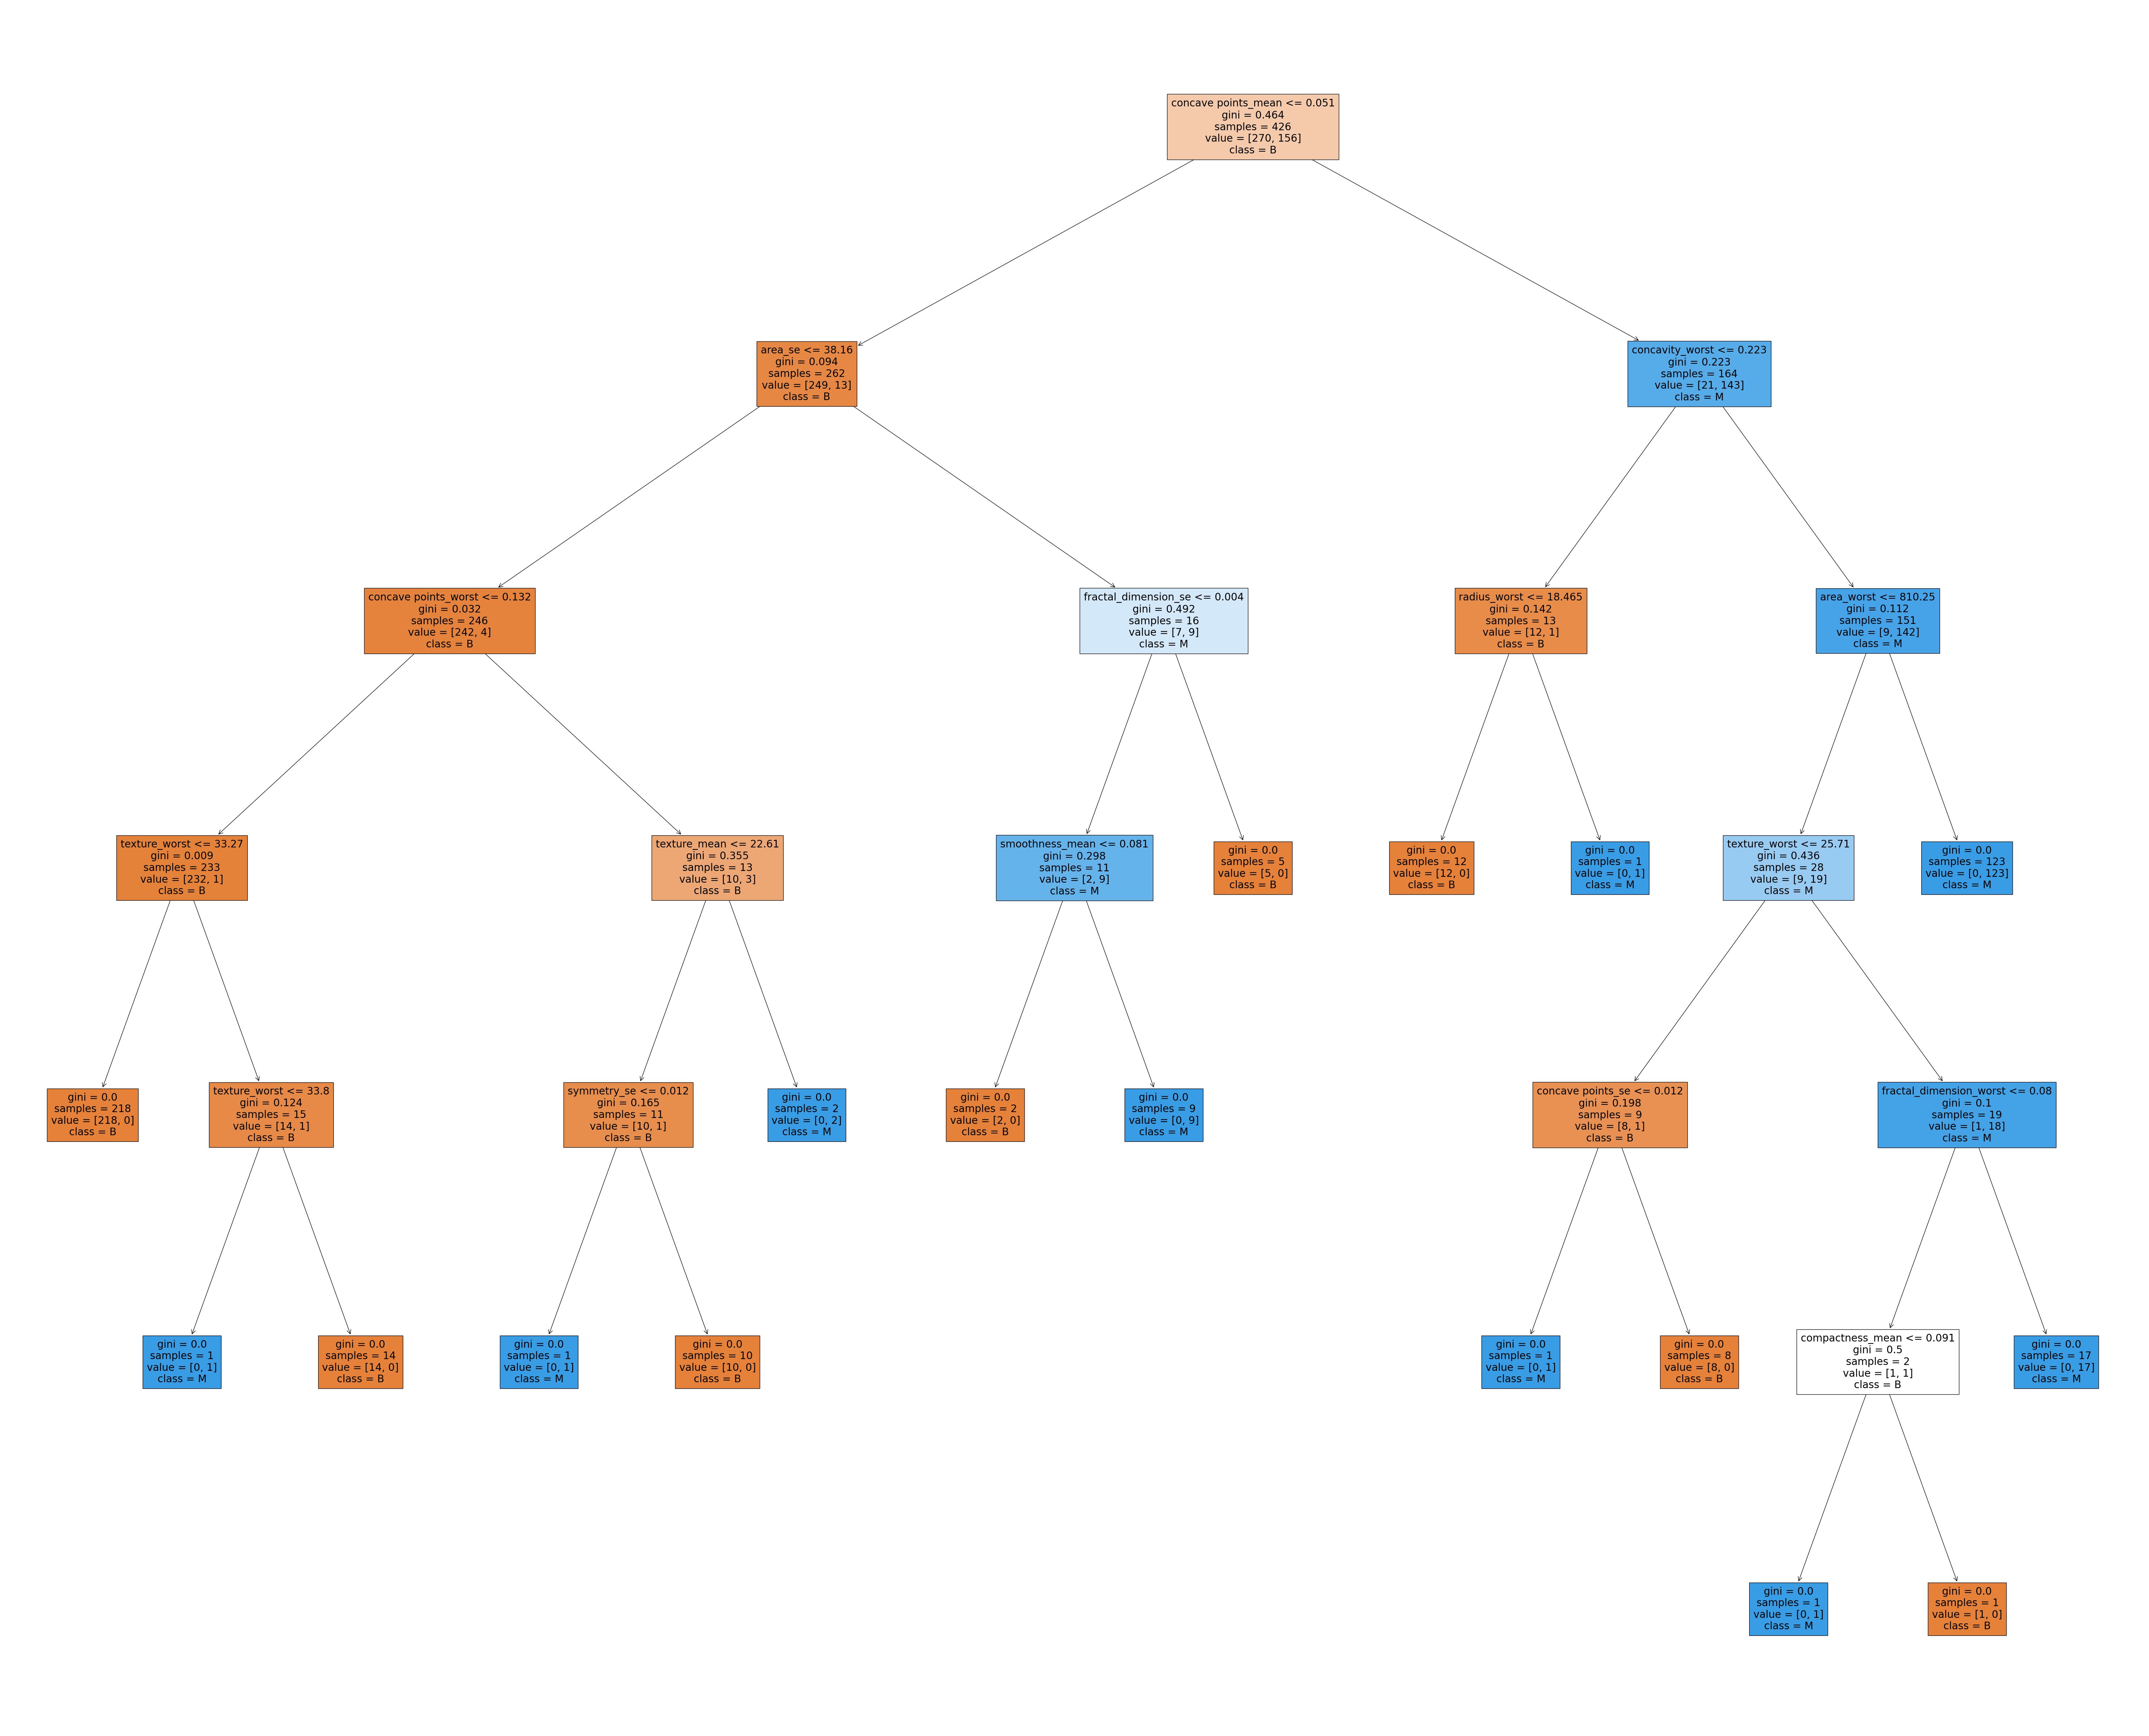

In [22]:
plt.figure(figsize = (80,65))
plot_tree(model, feature_names = X.columns, class_names = ['B','M'], filled = True)

In [23]:
print(tree.export_text(model))

|--- feature_7 <= 0.05
|   |--- feature_13 <= 38.16
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_21 <= 33.27
|   |   |   |   |--- class: B
|   |   |   |--- feature_21 >  33.27
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- class: B
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_1 <= 22.61
|   |   |   |   |--- feature_18 <= 0.01
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_18 >  0.01
|   |   |   |   |   |--- class: B
|   |   |   |--- feature_1 >  22.61
|   |   |   |   |--- class: M
|   |--- feature_13 >  38.16
|   |   |--- feature_19 <= 0.00
|   |   |   |--- feature_4 <= 0.08
|   |   |   |   |--- class: B
|   |   |   |--- feature_4 >  0.08
|   |   |   |   |--- class: M
|   |   |--- feature_19 >  0.00
|   |   |   |--- class: B
|--- feature_7 >  0.05
|   |--- feature_26 <= 0.22
|   |   |--- feature_20 <= 18.46
|   |   |   |--- class: B
|   |   |--- feature_

In [25]:
export_graphviz(model, out_file = "cancerArbre.dot", class_names = ['B','M'], 
                feature_names = X.columns, impurity = False, filled = True)